# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(study_results, mouse_metadata, how='outer',on = 'Mouse ID')
# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [29]:
# Checking the number of mice.
total_mouse = len(combined_df['Mouse ID'].unique())
total_mouse

249

In [30]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = combined_df.duplicated(subset=['Mouse ID', 'Timepoint','Tumor Volume (mm3)'], keep=False)
duplicate_mouse_ID = combined_df.loc[duplicate_mouse, 'Mouse ID'].unique()
duplicate_mouse_ID

array(['g989'], dtype=object)

In [31]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_df = combined_df.loc[combined_df['Mouse ID'] == duplicate_mouse_ID[0], :]
duplicate_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [32]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_df.drop(duplicate_mouse_df.index)
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [33]:
# Checking the number of mice in the clean DataFrame.
total_cleaned_mouse = len(cleaned_df['Mouse ID'].unique())
total_cleaned_mouse

248

## Summary Statistics

In [34]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
Drug_Regimen_gb = cleaned_df.groupby('Drug Regimen')
mean = Drug_Regimen_gb['Tumor Volume (mm3)'].mean()
median = Drug_Regimen_gb['Tumor Volume (mm3)'].median()
variance = Drug_Regimen_gb['Tumor Volume (mm3)'].var()
standard_deviation = Drug_Regimen_gb['Tumor Volume (mm3)'].std()
sem = Drug_Regimen_gb['Tumor Volume (mm3)'].sem()
summary_df = pd.DataFrame({'Mean Tumor Volume': mean,
                           'Median Tumor Volume': median,
                           'Tumor Volume Variance':variance,
                           'Tumor Volume Std. Dev.':standard_deviation,
                           'Tumor Volume Std. Err.':sem
                         })
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [35]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
new_summary_df = Drug_Regimen_gb['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
new_summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

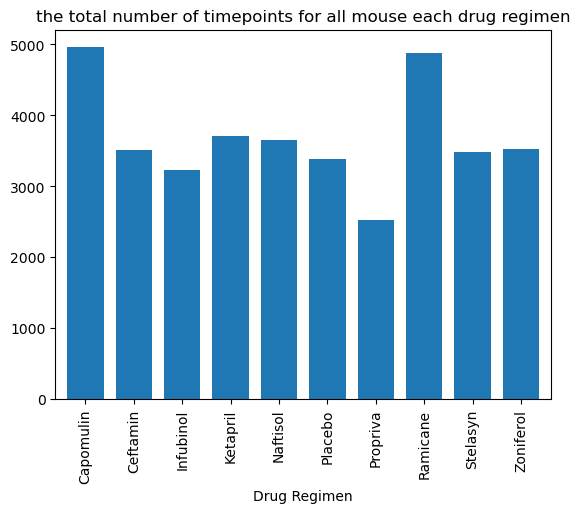

In [36]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint_drug_regimen = Drug_Regimen_gb['Timepoint'].sum()
timepoint_drug_regimen
timepoint_bar_plt = timepoint_drug_regimen.plot(kind='bar', width=0.75)
plt.title('the total number of timepoints for all mouse each drug regimen')

plt.show()

Text(0, 0.5, 'total timepoint')

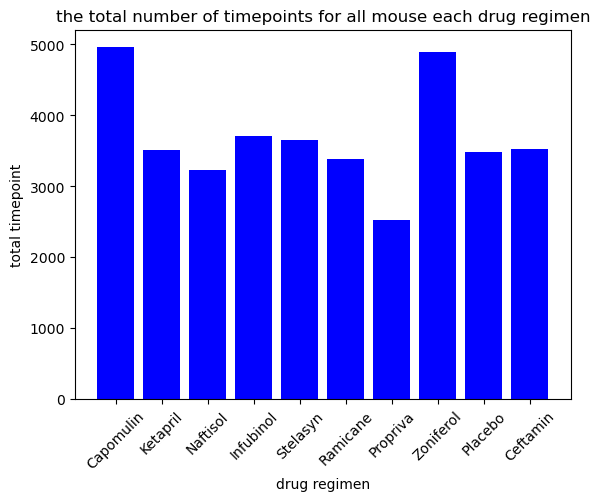

In [37]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_regimen = combined_df['Drug Regimen'].unique()
timepoint = Drug_Regimen_gb['Timepoint'].sum().tolist()
x_axis = np.arange(len(drug_regimen))
plt.bar(x_axis, timepoint, color="b", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_regimen, rotation = 45)
plt.title("the total number of timepoints for all mouse each drug regimen")
plt.xlabel("drug regimen")
plt.ylabel("total timepoint")


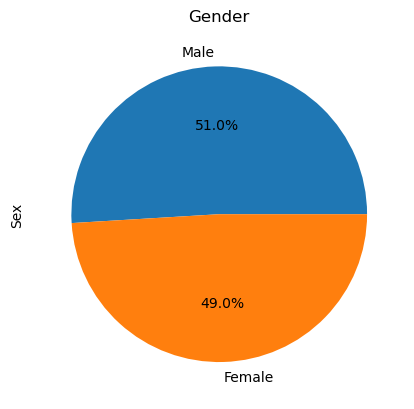

In [38]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
count_gender =  cleaned_df['Sex'].value_counts()
count_gender_pie = count_gender.plot(kind="pie", y='Sex',autopct="%1.1f%%",title = 'Gender')


Text(0.5, 1.0, 'Gender')

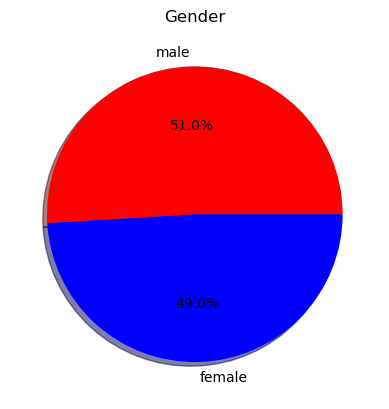

In [39]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = ['male','female']
count_gender =  cleaned_df['Sex'].value_counts().tolist()
colors = ["red", "blue"]
explode = (0,0)
plt.pie(count_gender, explode=explode, labels=gender, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=0)
plt.title('Gender')

## Quartiles, Outliers and Boxplots

In [40]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_df = cleaned_df.groupby(['Drug Regimen', 'Mouse ID']).last()
last_timepoint_df

Timepoint  Tumor Volume (mm3)  Metastatic Sites  \
Drug Regimen Mouse ID                                                    
Capomulin    b128             45           38.982878                 2   
             b742             45           38.939633                 0   
             f966             20           30.485985                 0   
             g288             45           37.074024                 1   
             g316             45           40.159220                 2   
...                          ...                 ...               ...   
Zoniferol    q633             45           70.827796                 2   
             s337             45           62.109651                 4   
             w140              5           47.717952                 0   
             w575             45           68.401286                 3   
             x613             15           48.077646                 0   

                          Sex  Age_months  Weight (g)  
Drug Regimen Mouse ID                                  
Capomulin    b128      Female           9          22  
             b742        Male           7          21  
             f966        Male          16          17  
             g288        Male           3          19  
             g316      Female          22          22  
...                       ...         ...         ...  
Zoniferol    q633        Male          12          25  
             s337        Male          14          27  
             w140      Female          19          30  
             w575      Female          16          28  
             x613      Female           2          29  

[248 rows x 6 columns]

In [41]:
# Put treatments into a list for for loop (and later for plot labels)
final_tumor_df = last_timepoint_df.reset_index()
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
new_list = []

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_list:
    drug_df = final_tumor_df.loc[final_tumor_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)'] 
    new_list.append(drug_df)
    new_list 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    quartiles = drug_df.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    mean = drug_df.mean()
    iqr = upperq-lowerq    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    # Determine outliers using upper and lower bounds
    outliers = drug_df.loc[(drug_df < lower_bound) | (drug_df > upper_bound)]
    print(f'{drug}Regimen: {outliers}')

CapomulinRegimen: Series([], Name: Tumor Volume (mm3), dtype: float64)
RamicaneRegimen: Series([], Name: Tumor Volume (mm3), dtype: float64)
InfubinolRegimen: 55    36.321346
Name: Tumor Volume (mm3), dtype: float64
CeftaminRegimen: Series([], Name: Tumor Volume (mm3), dtype: float64)


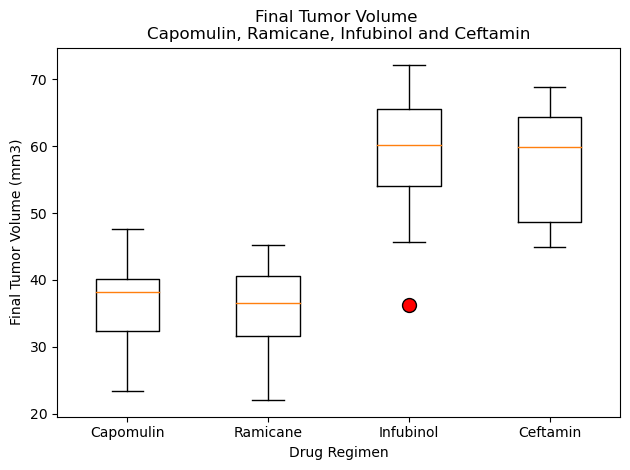

In [42]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, final_plot = plt.subplots()
final_plot.boxplot(new_list, labels=drug_list, flierprops={'markerfacecolor':'r','markersize': 10})
final_plot.set_title('Final Tumor Volume \nCapomulin, Ramicane, Infubinol and Ceftamin')
final_plot.set_xlabel('Drug Regimen')
final_plot.set_ylabel('Final Tumor Volume (mm3)')
plt.tight_layout()

## Line and Scatter Plots

Text(0, 0.5, 'Final Tumor Volume (mm3)')

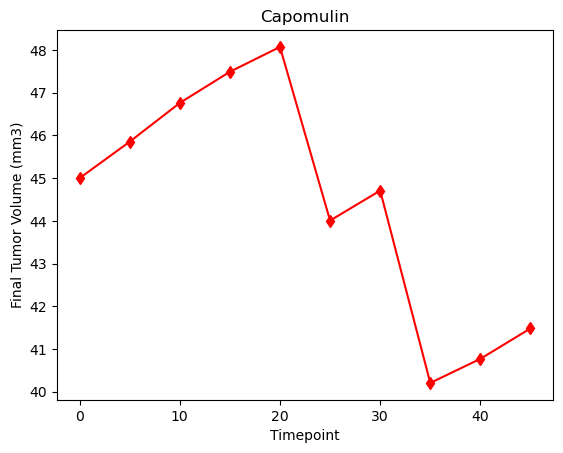

In [43]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_df = cleaned_df.loc[cleaned_df['Drug Regimen']== 'Capomulin']
line_Capomulin_df = Capomulin_df.loc[Capomulin_df['Mouse ID']== 'l509']
line_plot = plt.plot(line_Capomulin_df['Timepoint'], line_Capomulin_df['Tumor Volume (mm3)'],
                     marker='d', color='red')
plt.title('Capomulin')
plt.xlabel('Timepoint')
plt.ylabel('Final Tumor Volume (mm3)')

Text(0, 0.5, 'Average Tumor Volume (mm3)')

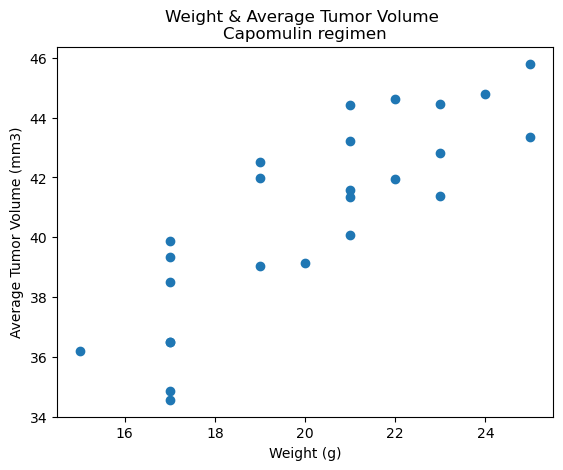

In [44]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatter_Capomulin_gp = Capomulin_df.groupby('Mouse ID').mean()
weight = scatter_Capomulin_gp['Weight (g)']
tumor_volume = scatter_Capomulin_gp['Tumor Volume (mm3)']
plt.scatter(weight, tumor_volume)
plt.title('Weight & Average Tumor Volume \nCapomulin regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

## Correlation and Regression

The correlation between mouse weight and tumor vol is 0.84


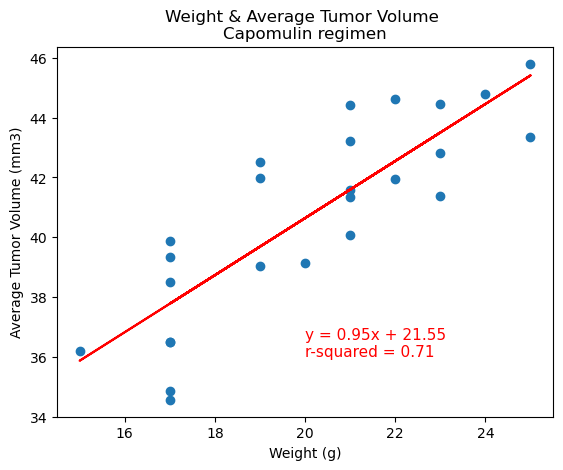

In [56]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = weight
y_values = tumor_volume
correlation = round(st.pearsonr(x_values, y_values)[0],2)
print(f"The correlation between mouse weight and tumor vol is {correlation}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
r_squared = round(rvalue**2,2)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.annotate(f'{line_eq}\nr-squared = {r_squared}', (20,36), fontsize=11, color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Weight & Average Tumor Volume \nCapomulin regimen')
plt.show()

In [59]:
conclusion1 = 'Conclusion One:\nWith the pie chart of gender, we can tell gender is controlled before experiment. Male amount is almost same with female.\n\n'
conclusion2 = 'Conclusion Two:\nWith the liner plot of timepoint and Average Tumor Volume (mm3), it seems that Capomulin Treatment will decrease tumor after 20 timepoint. However, after 35 timepoint, the treatment will be useless.Tumor grows up again.\n\n'
conclusion3 = f'Conclusion Three:\nWith the Correlation and Regression plot, weight and tumor volume is strongly related because of 0.84 correlation. Also, if mouses gain 1g weight, the tumor volume will grow up {round(slope,2)} mm3'
conclusion = conclusion1+conclusion2+conclusion3
with open('report.txt', 'w') as t:
    t.write(conclusion)